# Check the urban boundary data

   ORIG_FID  urbanArea                                           geometry
0         0    2.36368  POLYGON ((167.71618 -45.40445, 167.71672 -45.4...
1         1    1.66665  POLYGON ((168.32228 -46.13181, 168.32470 -46.1...
2         2   25.35900  POLYGON ((168.35731 -46.44119, 168.35704 -46.4...
3         3    2.60665  POLYGON ((168.71547 -45.01638, 168.71601 -45.0...
4         4    1.21692  POLYGON ((168.72840 -45.01476, 168.73002 -45.0...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65462 entries, 0 to 65461
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ORIG_FID   65462 non-null  int64   
 1   urbanArea  65462 non-null  float64 
 2   geometry   65462 non-null  geometry
dtypes: float64(1), geometry(1), int64(1)
memory usage: 1.5 MB


<Axes: >

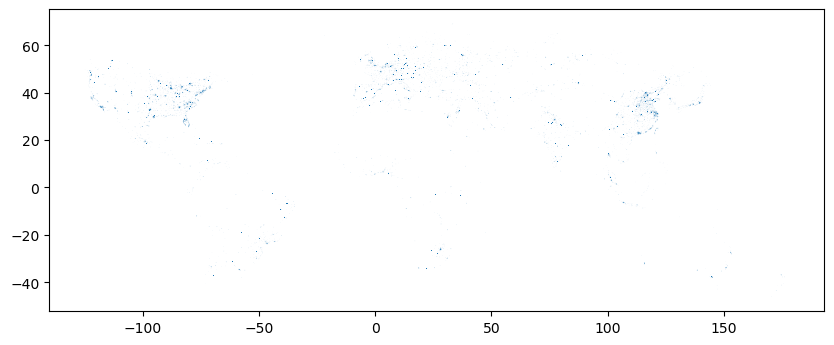

In [8]:

import geopandas as gpd

# Specify the path to the .shp file
shapefile_path = 'GUB_Global_2018.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path, engine='pyogrio')

# Display the first few rows of the GeoDataFrame
print(gdf.head())

# View basic information about the GeoDataFrame
gdf.info()

# Optional: Plot the map to visualize the data
gdf.plot(figsize=(10, 6))

# The global urban boundary data matches that of Chinese cities

Global cities CRS: EPSG:4326
Chinese city boundaries CRS: EPSG:4490


C:\Windows\Temp\ipykernel_15400\2668599018.py:38: UserWarning: `keep_geom_type=True` in overlay resulted in 3 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  clipped_cities = gpd.overlay(intersected_cities, gdf_china_cities.iloc[[idx]], how='intersection')
C:\Windows\Temp\ipykernel_15400\2668599018.py:38: UserWarning: `keep_geom_type=True` in overlay resulted in 1 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  clipped_cities = gpd.overlay(intersected_cities, gdf_china_cities.iloc[[idx]], how='intersection')


Unique city names in the extracted GeoDataFrame:
['梅州市' '鄂州市' '吕梁市' '舟山市' '朝阳市' '广安市' '濮阳市' '宣城市' '六盘水市' '深圳市' '三明市' '景德镇市'
 '楚雄彝族自治州' '大连市' '攀枝花市' '贺州市' '西安市' '淮北市' '邵阳市' '石家庄市' '汕尾市' '荆门市' '衢州市'
 '迪庆藏族自治州' '宜宾市' '葫芦岛市' '济南市' '贵阳市' '珠海市' '长春市' '延边朝鲜族自治州' '萍乡市' '庆阳市'
 '泉州市' '自贡市' '临沂市' '百色市' '鞍山市' '铜陵市' '唐山市' '岳阳市' '河源市' '孝感市' '金华市' '兴安盟'
 '盘锦市' '雅安市' '亳州市' '商洛市' '盐城市' '汕头市' '安顺市' '黔南布依族苗族自治州' '厦门市' '阿克苏地区'
 '红河哈尼族彝族自治州' '甘南藏族自治州' '太原市' '常德市' '牡丹江市' '淮南市' '德阳市' '威海市' '秦皇岛市' '绍兴市'
 '阳江市' '铁岭市' '达州市' '池州市' '淮安市' '遵义市' '黔东南苗族侗族自治州' '莆田市' '南昌市' '佛山市' '大同市'
 '昆明市' '张家界市' '泸州市' '沈阳市' '邯郸市' '马鞍山市' '日照市' '三亚市' '台湾省' '十堰市' '呼和浩特市'
 '德宏傣族景颇族自治州' '梧州市' '枣庄市' '安阳市' '怀化市' '阳泉市' '保亭黎族苗族自治县' '鹰潭市' '陵水黎族自治县'
 '博尔塔拉蒙古自治州' '乐东黎族自治县' '辽源市' '齐齐哈尔市' '龙岩市' '天门市' '潜江市' '邢台市' '仙桃市' '绥化市'
 '丹东市' '滨州市' '镇江市' '昌江黎族自治县' '周口市' '白沙黎族自治县' '临高县' '吐鲁番市' '澄迈县' '长沙市'
 '屯昌县' '定安县' '海口市' '乐山市' '凉山彝族自治州' '桂林市' '东营市' '鹤壁市' '娄底市' '包头市' '锡林郭勒盟'
 '琼中黎族苗族自治县' '长治市' '赣州市' '通化市' '巴音郭楞蒙古自治州' '上海市' '鸡西市' '宁德市' '保定市' '菏泽市'
 '崇左市' '黑

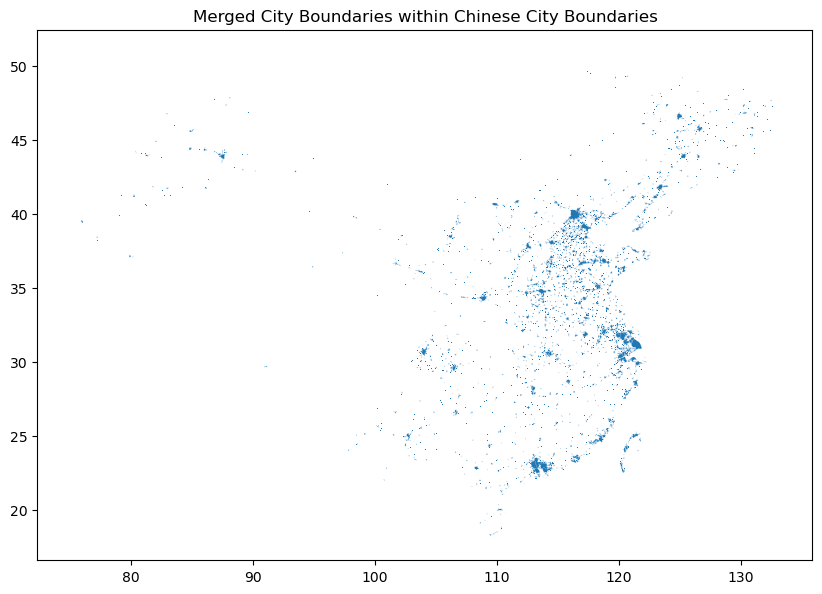

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Specify file paths
global_cities_path = 'GUB_Global_2018.shp'
city_boundaries_path = '中国_市.geojson'

# Read global urban boundary data
gdf_global = gpd.read_file(global_cities_path, engine='pyogrio')

# Read Chinese municipal administrative boundary data
gdf_china_cities = gpd.read_file(city_boundaries_path, engine='pyogrio')

# Print original CRS information
print("Global cities CRS:", gdf_global.crs)
print("Chinese city boundaries CRS:", gdf_china_cities.crs)

# Use EPSG:4326 as the target CRS
target_crs = 'EPSG:4326'
gdf_global = gdf_global.to_crs(target_crs)
gdf_china_cities = gdf_china_cities.to_crs(target_crs)

# Create an empty list to store result GeoDataFrames
result_gdfs = []

# Iterate over each Chinese municipal administrative region, using spatial index for acceleration
for idx, city in gdf_china_cities.iterrows():
    city_boundary = city.geometry
    
    # Use spatial index to speed up geometric intersection testing
    potential_matches_index = list(gdf_global.sindex.intersection(city_boundary.bounds))
    potential_matches = gdf_global.iloc[potential_matches_index]
    intersected_cities = potential_matches[potential_matches.intersects(city_boundary)]
    
    if not intersected_cities.empty:
        # Clip intersected cities to the municipal boundary
        clipped_cities = gpd.overlay(intersected_cities, gdf_china_cities.iloc[[idx]], how='intersection')
        
        # Add administrative name and other identifier fields (copied from original GeoDataFrame)
        clipped_cities['name'] = city['name']
        clipped_cities['gb'] = city['gb']
        
        # Store the result
        result_gdfs.append(clipped_cities)

# Merge all results
if result_gdfs:
    final_result = gpd.GeoDataFrame(pd.concat(result_gdfs, ignore_index=True))
else:
    print("No cities found within the specified Chinese city boundaries.")
    final_result = gpd.GeoDataFrame()

# Save the result to a new shapefile with UTF-8 encoding
final_result.to_file('extracted_city_boundariesChina335.shp', driver='ESRI Shapefile', encoding='utf-8')

# Print unique city names in the extracted GeoDataFrame
print("Unique city names in the extracted GeoDataFrame:")
print(final_result['name'].unique())

# Print column names (labels) of the extracted GeoDataFrame
print("Columns in the extracted GeoDataFrame:", final_result.columns.tolist())

# Print the first few rows of the extracted GeoDataFrame
print("First few rows of the extracted GeoDataFrame:")
print(final_result.head())

# Dissolve geometries by city name to form complex polygons, while preserving the 'gb' column
if not final_result.empty:
    # Use dissolve method and specify aggregation for non-geometry fields
    merged_result = final_result.dissolve(by='name', aggfunc={'urbanArea': 'first', 'gb': 'first'}, as_index=False)

    # Save the merged result to a new shapefile with UTF-8 encoding
    merged_result.to_file('merged_city_boundariesChina335.shp', driver='ESRI Shapefile', encoding='utf-8')

    # Print basic information about the merged GeoDataFrame
    print("\nMerged GeoDataFrame information:")
    print("Number of features after merging:", len(merged_result))
    print("Columns in the merged GeoDataFrame:", merged_result.columns.tolist())
    print("First few rows of the merged GeoDataFrame:")
    print(merged_result.head())

    # Visualize the merged data (optional)
    if not merged_result.empty:
        merged_result.plot(figsize=(10, 10))
        plt.title('Merged City Boundaries within Chinese City Boundaries')
        plt.show()
    else:
        print("No data to visualize.")
else:
    print("No data to merge or visualize.")    
    
    

# The global urban boundary data matches that of European cities

In [41]:
import geopandas as gpd

# Specify file path
nuts3_boundaries_path = 'NUTS_RG_20M_2021_4326.geojson'

# Read NUTS level 3 administrative boundary data
gdf_nuts3 = gpd.read_file(nuts3_boundaries_path, engine='pyogrio')

# Print the column names (labels) of the GeoDataFrame
print("Columns in the NUTS 3 GeoDataFrame:", gdf_nuts3.columns.tolist())

# Print the first few rows of the GeoDataFrame
print("First few rows of the NUTS 3 GeoDataFrame:")
print(gdf_nuts3.head())

# Print the CRS used by the GeoDataFrame
print("CRS of the NUTS 3 GeoDataFrame:", gdf_nuts3.crs)

Columns in the NUTS 3 GeoDataFrame: ['NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'geometry']
First few rows of the NUTS 3 GeoDataFrame:
  NUTS_ID  LEVL_CODE CNTR_CODE     NAME_LATN     NUTS_NAME  MOUNT_TYPE  \
0      FR          0        FR        France        France         0.0   
1      HR          0        HR      Hrvatska      Hrvatska         0.0   
2      HU          0        HU  Magyarország  Magyarország         0.0   
3      AL          0        AL     Shqipëria     Shqipëria         0.0   
4      AT          0        AT    Österreich    Österreich         0.0   

   URBN_TYPE  COAST_TYPE                                           geometry  
0          0           0  MULTIPOLYGON (((55.21471 -21.03851, 55.27392 -...  
1          0           0  MULTIPOLYGON (((16.59680 46.47590, 16.85476 46...  
2          0           0  POLYGON ((21.42465 48.57472, 21.60691 48.49458...  
3          0           0  POLYGON ((19.73492 42

# Merge multiple geometric objects of European cities

Unique NUTS names in the extracted GeoDataFrame:
['Nürnberg, Kreisfreie Stadt' 'Schwabach, Kreisfreie Stadt'
 'Ansbach, Landkreis' ... 'Kilis' 'Şanlıurfa' 'Diyarbakır']
Columns in the extracted GeoDataFrame: ['ORIG_FID', 'urbanArea', 'NUTS_ID', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'geometry']
First few rows of the extracted GeoDataFrame:
   ORIG_FID  urbanArea NUTS_ID  LEVL_CODE CNTR_CODE  \
0     27466  165.62700   DE254          3        DE   
1     27467    1.05733   DE254          3        DE   
2     27485    2.20394   DE254          3        DE   
3     27491    2.38280   DE254          3        DE   
4     27514    3.66487   DE254          3        DE   

                    NAME_LATN                   NUTS_NAME  MOUNT_TYPE  \
0  Nürnberg, Kreisfreie Stadt  Nürnberg, Kreisfreie Stadt         4.0   
1  Nürnberg, Kreisfreie Stadt  Nürnberg, Kreisfreie Stadt         4.0   
2  Nürnberg, Kreisfreie Stadt  Nürnberg, Kreisfreie St

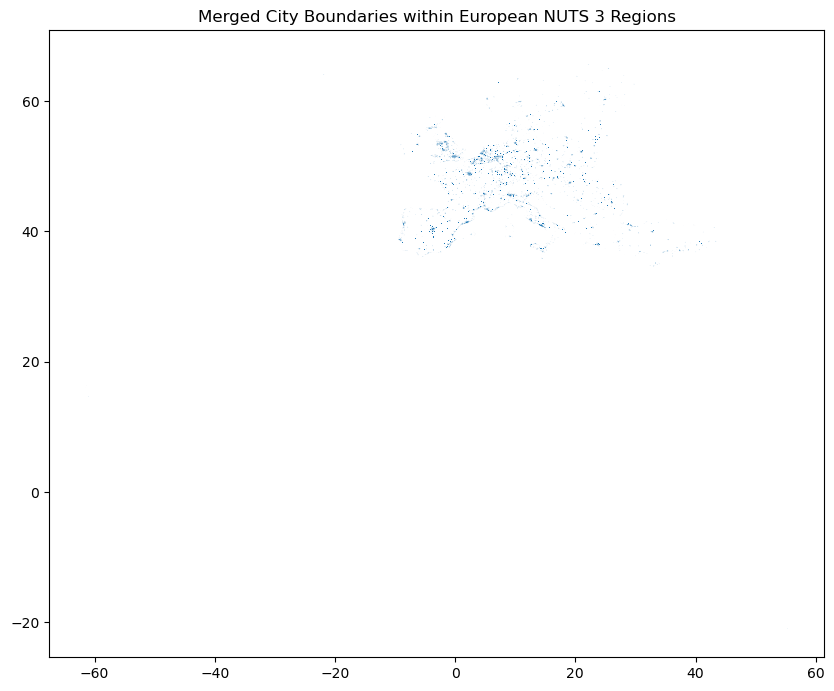

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Specify file paths
global_cities_path = 'GUB_Global_2018.shp'
nuts3_boundaries_path = 'NUTS_RG_20M_2021_4326.geojson'

# Read global urban boundary data
gdf_global = gpd.read_file(global_cities_path, engine='pyogrio')

# Read NUTS level 3 administrative boundary data and filter for LEVL_CODE == 3
gdf_nuts3 = gpd.read_file(nuts3_boundaries_path, engine='pyogrio')
gdf_nuts3 = gdf_nuts3[gdf_nuts3['LEVL_CODE'] == 3]  # Keep only NUTS 3 level regions

# Ensure both GeoDataFrames use the same CRS
gdf_global = gdf_global.to_crs(gdf_nuts3.crs)

# Create an empty list to store result GeoDataFrames
result_gdfs = []

# Iterate over each NUTS 3 administrative region
for idx, nuts3 in gdf_nuts3.iterrows():
    city_boundary = nuts3.geometry

    if city_boundary is not None and not city_boundary.is_empty:
        # Find global cities that intersect with this NUTS 3 region
        intersected_cities = gdf_global[gdf_global.geometry.intersects(city_boundary)]

        if not intersected_cities.empty:
            # Clip intersected cities to the NUTS 3 boundary
            clipped_cities = gpd.overlay(intersected_cities, gdf_nuts3.loc[[idx]], how='intersection')
            
            # Add region identifiers (from the original GeoDataFrame)
            clipped_cities['NUTS_ID'] = nuts3['NUTS_ID']
            clipped_cities['NUTS_NAME'] = nuts3['NUTS_NAME']
            
            # Store the result
            result_gdfs.append(clipped_cities)
    else:
        print(f"Skipping NUTS 3 region with index {idx} due to invalid or empty geometry.")

# Merge all results
if result_gdfs:
    final_result = gpd.GeoDataFrame(pd.concat(result_gdfs, ignore_index=True))
else:
    print("No cities found within the specified NUTS 3 boundaries.")
    final_result = gpd.GeoDataFrame()

# Save the result to a new shapefile with UTF-8 encoding
final_result.to_file('extracted_city_boundariesEurope2.shp', driver='ESRI Shapefile', encoding='utf-8')

# Print unique NUTS names in the extracted GeoDataFrame
print("Unique NUTS names in the extracted GeoDataFrame:")
print(final_result['NUTS_NAME'].unique())

# Print column names (labels) of the extracted GeoDataFrame
print("Columns in the extracted GeoDataFrame:", final_result.columns.tolist())

# Print the first few rows of the extracted GeoDataFrame
print("First few rows of the extracted GeoDataFrame:")
print(final_result.head())

# Dissolve geometries by NUTS_ID to form complex polygons (merge all urban areas within each NUTS 3 region)
merged_result = final_result.dissolve(by='NUTS_ID', aggfunc='first', as_index=False)

# Save the merged result to a new shapefile with UTF-8 encoding
merged_result.to_file('merged_city_boundariesEurope2.shp', driver='ESRI Shapefile', encoding='utf-8')

# Print basic information about the merged GeoDataFrame
print("\nMerged GeoDataFrame information:")
print("Number of features after merging:", len(merged_result))
print("Columns in the merged GeoDataFrame:", merged_result.columns.tolist())
print("First few rows of the merged GeoDataFrame:")
print(merged_result.head())

# Visualize the merged data (optional)
if not merged_result.empty:
    merged_result.plot(figsize=(10, 10))
    plt.title('Merged City Boundaries within European NUTS 3 Regions')
    plt.show()
else:
    print("No data to visualize.")

Columns in the extracted GeoDataFrame: ['NUTS_ID', 'ORIG_FID', 'urbanArea', 'LEVL_CODE', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE', 'geometry']
First few rows of the extracted GeoDataFrame:
  NUTS_ID  ORIG_FID  urbanArea  LEVL_CODE CNTR_CODE NAME_LATN NUTS_NAME  \
0   AL011     14233    1.12160          3        AL     Dibër     Dibër   
1   AL012     14204   28.92070          3        AL    Durrës    Durrës   
2   AL013     14231    1.95191          3        AL     Kukës     Kukës   
3   AL014     14213    2.98634          3        AL     Lezhë     Lezhë   
4   AL015     14209   13.49910          3        AL   Shkodër   Shkodër   

   MOUNT_TYPE  URBN_TYPE  COAST_TYPE  \
0         4.0          3           3   
1         4.0          2           1   
2         4.0          3           3   
3         4.0          3           1   
4         4.0          2           1   

                                            geometry  
0  POLYGON ((20.42850 41.6

<Figure size 1000x800 with 0 Axes>

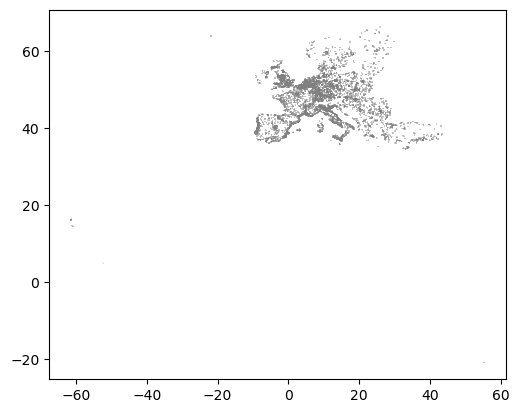

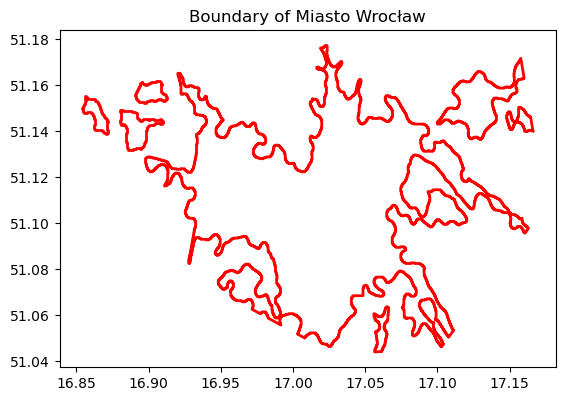

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Specify file path
extracted_cities_path = 'merged_city_boundariesEurope2.shp'

# Read the extracted city boundaries data
gdf_extracted = gpd.read_file(extracted_cities_path, engine='pyogrio')

# Print the column names (labels) of the GeoDataFrame
print("Columns in the extracted GeoDataFrame:", gdf_extracted.columns.tolist())

# Print the first few rows of the extracted GeoDataFrame
print("First few rows of the extracted GeoDataFrame:")
print(gdf_extracted.head())

# Randomly select one city
if not gdf_extracted.empty:
    random_city = gdf_extracted.sample(1).iloc[0]
    target_city_name = random_city['NUTS_NAME']
    
    # Filter data for the selected city
    selected_city = gdf_extracted[gdf_extracted['NUTS_NAME'] == target_city_name]

    if not selected_city.empty:
        # Set figure size
        plt.figure(figsize=(10, 8))

        # Plot the boundary of the entire extracted dataset as background
        gdf_extracted.boundary.plot(color="gray", linewidth=0.5, alpha=0.5)

        # Plot the boundary of the selected city
        selected_city.boundary.plot(color="red", linewidth=2)

        # Add title
        plt.title(f'Boundary of {target_city_name}')

        # Display the plot
        plt.show()
else:
    print("The extracted GeoDataFrame is empty.")


# The global urban boundary data matches that of USA counties
# Merge multiple geometric objects in the same county  (USA)

C:\Users\ZF\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Windows\Temp\ipykernel_7552\925256545.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directl

Unique county names in the extracted GeoDataFrame:
['San Francisco' 'Suffolk' 'Vance' ... 'Macomb' 'Toa Baja' 'Adjuntas']
Columns in the extracted GeoDataFrame: ['ORIG_FID', 'urbanArea', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geometry', 'COUNTY_NAME']
First few rows of the extracted GeoDataFrame:
   ORIG_FID   urbanArea STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID  \
0     53947  2359.60000      06      075  00277302  0500000US06075  06075   
1     57267  1513.27000      25      025  00606939  0500000US25025  25025   
2     59209     2.04247      37      181  01008591  0500000US37181  37181   
3     59214     1.50658      37      181  01008591  0500000US37181  37181   
4     59217    47.81520      37      181  01008591  0500000US37181  37181   

            NAME LSAD      ALAND     AWATER  \
0  San Francisco   06  121485107  479107241   
1        Suffolk   06  150855462  160479920   
2          Vance   06  653705784   42187365  

C:\Windows\Temp\ipykernel_7552\925256545.py:71: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_result.to_file('merged_city_boundariesUSCounties2.shp', driver='ESRI Shapefile', encoding='utf-8')



Merged GeoDataFrame information:
Number of features after merging: 2751
Columns in the merged GeoDataFrame: ['STATEFP', 'COUNTYFP', 'geometry', 'ORIG_FID', 'urbanArea', 'COUNTYNS', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'COUNTY_NAME']
First few rows of the merged GeoDataFrame:
  STATEFP COUNTYFP                                           geometry  \
0      01      001  MULTIPOLYGON (((-86.47165 32.42235, -86.47111 ...   
1      01      003  MULTIPOLYGON (((-87.86628 30.23675, -87.86655 ...   
2      01      005  MULTIPOLYGON (((-85.15975 31.82677, -85.15975 ...   
3      01      007  MULTIPOLYGON (((-87.14727 32.95191, -87.14646 ...   
4      01      009  POLYGON ((-86.44416 33.97653, -86.44416 33.976...   

   ORIG_FID  urbanArea  COUNTYNS        AFFGEOID  GEOID     NAME LSAD  \
0     53113   32.71450  00161526  0500000US01001  01001  Autauga   06   
1     53212    1.08542  00161527  0500000US01003  01003  Baldwin   06   
2     53022    1.52257  00161528  0500000US010

<Figure size 1000x800 with 0 Axes>

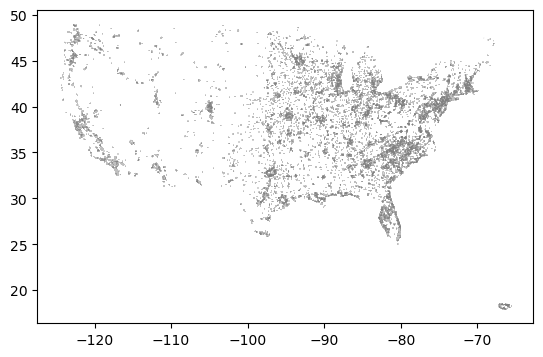

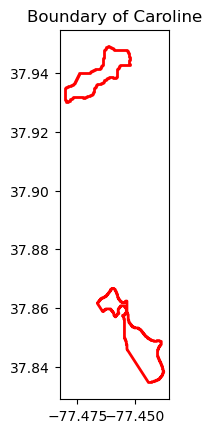

In [2]:
# import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Specify file paths
global_cities_path = 'GUB_Global_2018.shp'
us_counties_path = 'counties.geojson'

# Read global city boundary data
gdf_global = gpd.read_file(global_cities_path, engine='pyogrio')

# Read US county administrative division data
gdf_us_counties = gpd.read_file(us_counties_path, engine='pyogrio')

# Ensure both GeoDataFrames use the same CRS
gdf_global = gdf_global.to_crs(gdf_us_counties.crs)

# Create an empty GeoDataFrame to store results
result_gdfs = []

# Iterate through each US county administrative division
for idx, county in gdf_us_counties.iterrows():
    county_boundary = county.geometry

    if county_boundary is not None and not county_boundary.is_empty:
        # Find city boundaries that intersect with this county
        intersected_cities = gdf_global[gdf_global.geometry.intersects(county_boundary)]

        if not intersected_cities.empty:
            # Clip the intersection to within the county boundary
            clipped_cities = gpd.overlay(intersected_cities, gdf_us_counties.loc[[idx]], how='intersection')
            
            # Add administrative name and other identifier information (copied directly from the original GeoDataFrame)
            clipped_cities['STATEFP'] = county['STATEFP']
            clipped_cities['COUNTYFP'] = county['COUNTYFP']
            clipped_cities['COUNTY_NAME'] = county['NAME']
            
            # Store results
            result_gdfs.append(clipped_cities)
    else:
        print(f"Skipping county with index {idx} due to invalid geometry.")

# Merge all results
if result_gdfs:
    final_result = gpd.GeoDataFrame(pd.concat(result_gdfs, ignore_index=True))
else:
    print("No cities found within the specified US county boundaries.")
    final_result = gpd.GeoDataFrame()

# Save the results to a new shapefile and specify encoding
final_result.to_file('extracted_city_boundariesUSCounties2.shp', driver='ESRI Shapefile', encoding='utf-8')

# Print all unique county names
print("Unique county names in the extracted GeoDataFrame:")
print(final_result['COUNTY_NAME'].unique())

# Print column names (labels) of the extracted GeoDataFrame
print("Columns in the extracted GeoDataFrame:", final_result.columns.tolist())

# Print the first few rows of the extracted GeoDataFrame
print("First few rows of the extracted GeoDataFrame:")
print(final_result.head())

# Merge geometries within the same county to form a complex polygon
merged_result = final_result.dissolve(by=['STATEFP', 'COUNTYFP'], aggfunc='first', as_index=False)

# If you need to retain information from other non-geometry columns, ensure their uniqueness or select specific values before dissolving
# merged_result['COUNTY_NAME'] = final_result.groupby(['STATEFP', 'COUNTYFP'])['COUNTY_NAME'].first().values

# Save the merged results to a new shapefile and specify encoding
merged_result.to_file('merged_city_boundariesUSCounties2.shp', driver='ESRI Shapefile', encoding='utf-8')

# Print basic information about the merged GeoDataFrame
print("\nMerged GeoDataFrame information:")
print("Number of features after merging:", len(merged_result))
print("Columns in the merged GeoDataFrame:", merged_result.columns.tolist())
print("First few rows of the merged GeoDataFrame:")
print(merged_result.head())

# Randomly select one county for visualization
if not merged_result.empty:
    random_county = merged_result.sample(1).iloc[0]
    target_statefp = random_county['STATEFP']
    target_countyfp = random_county['COUNTYFP']
    
    # Filter data for the selected county
    selected_county = merged_result[(merged_result['STATEFP'] == target_statefp) & 
                                    (merged_result['COUNTYFP'] == target_countyfp)]

    if not selected_county.empty:
        # Set figure size
        plt.figure(figsize=(10, 8))

        # Plot the entire extracted dataset as background
        merged_result.boundary.plot(color="gray", linewidth=0.5, alpha=0.5)

        # Plot the boundary of the selected county
        selected_county.boundary.plot(color="red", linewidth=2)

        # Add title
        plt.title(f'Boundary of {random_county["COUNTY_NAME"]}')

        # Display the plot
        plt.show()
else:
    print("The merged GeoDataFrame is empty.")

